In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#1Loading the Dataset
path = r"C:\Users\aksaj\OneDrive\Documents\diabetes.csv"
dt = pd.read_csv(path)
#2 Preprocessing the Data

##1 Identify the columns with zero and replacing with NaN
columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
dt[columns] = dt[columns].replace(0,np.nan)
##2 Fill the Nan values with median of the respective column
dt[columns] = dt[columns].fillna(dt[columns].median())


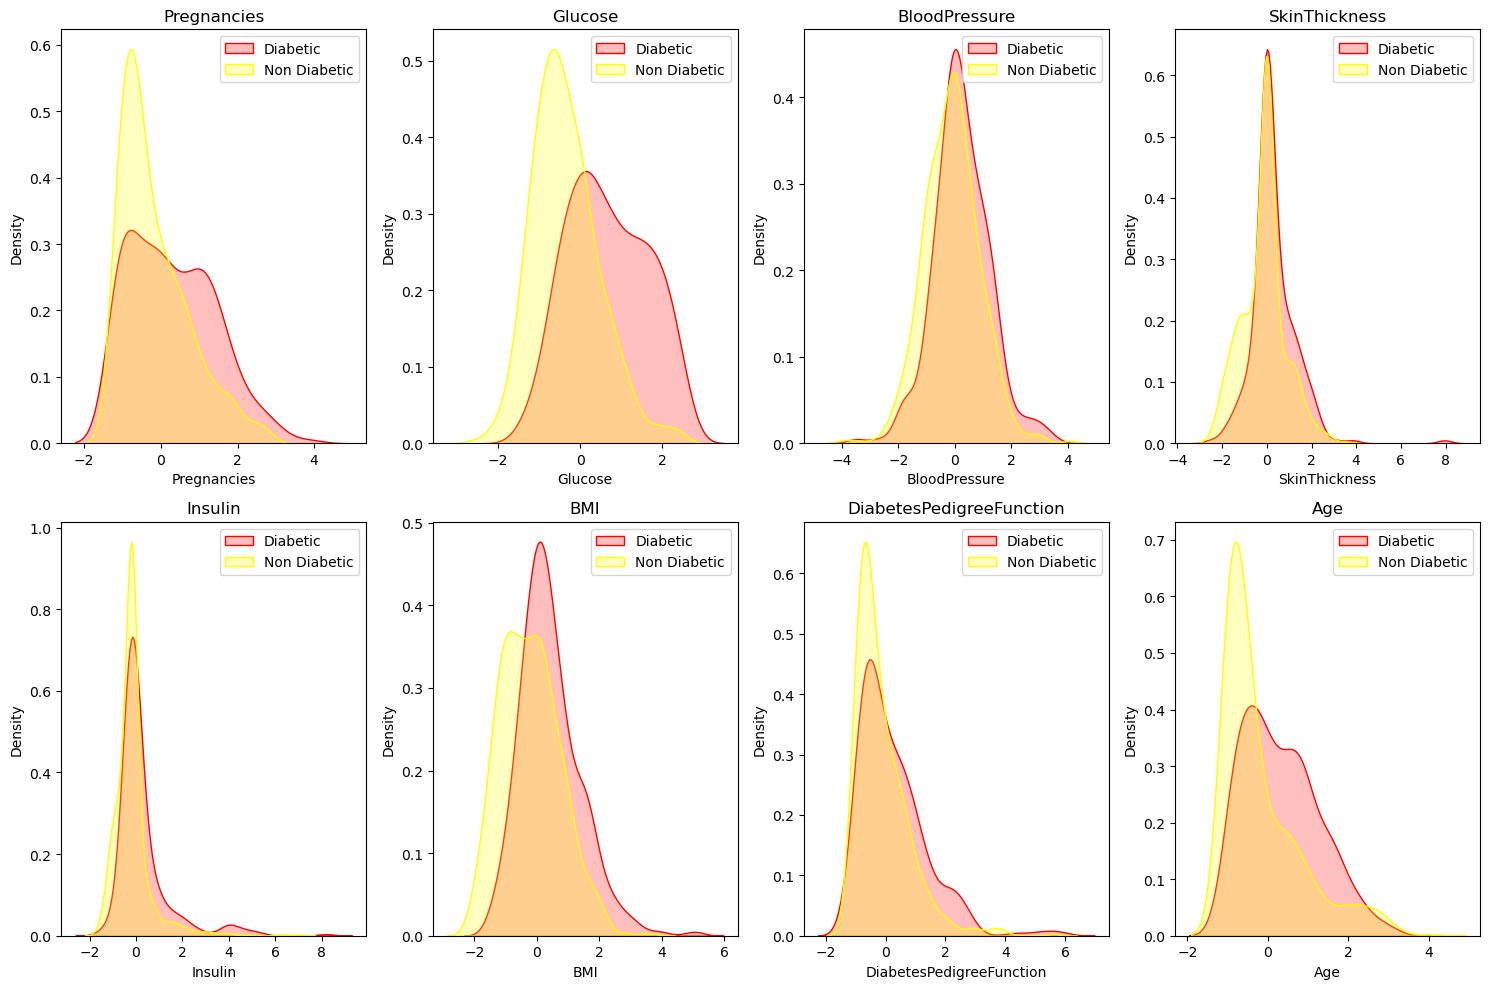

In [13]:
#3  For Data Analysis plotting density diagram
cols = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
#For plotting Separate the data into Diabetic and healthy group
dt_diab = dt[dt['Outcome'] ==1] # diabetic peoples
dt_hlth = dt[dt['Outcome'] ==0]#healthy peoples
#Creating plots
plt.figure(figsize=(15,10))
for i, col in enumerate (cols,1):
    plt.subplot(2,4,i)
    sns.kdeplot(dt_diab[col], color = "red", label = "Diabetic", fill = True)
    sns.kdeplot(dt_hlth[col], color = "yellow", label = "Non Diabetic", fill = True)
    plt.title(col)
    plt.legend()
    
plt.tight_layout()
plt.show()
                
            


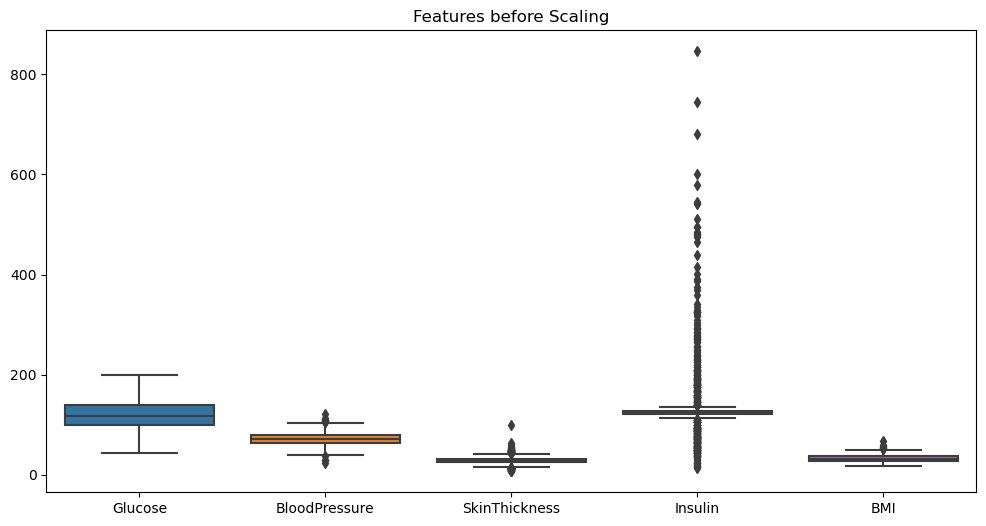

In [4]:
# Visualising the data before and after scaling for comparison
plt.figure(figsize =(12,6))
sns.boxplot(data=dt[columns])
plt.title("Features before Scaling")
plt.show()

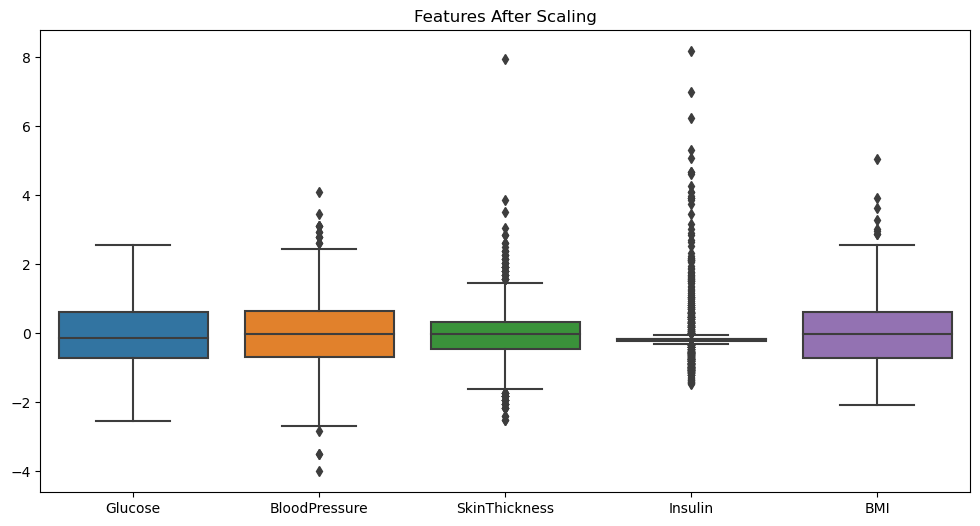

In [5]:
#Scaling
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scaled_col= dt.columns[:-1]
dt[scaled_col]= scal.fit_transform(dt[scaled_col])

#After SCaling
plt.figure(figsize=(12,6))
sns.boxplot(data=dt[columns])
plt.title("Features After Scaling")
plt.show()

In [6]:
#splitting the data 
X= dt.drop(columns = 'Outcome').values
y= dt['Outcome'].values

#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=42)

In [7]:
#Perceptron Algorithm
class Perceptron:
    def __init__(self,l_rate = 0.01, iters =1000):
        self.l_rate = l_rate
        self.iters = iters
        self.weights= None
        self.bias = None
        
    def fit(self,X,y):
        n_samples, n_features= X.shape
        #Initialize weight and bias
        self.weights = np.zeros(n_features)
        self.bias =0
        
        #converting y to +1 and -1 for perceptron learning rule
        y_ = np.where(y>0,1,-1)
        
        for  t in range(self.iters):
            for i, x_i in enumerate(X):
                linear_output = np.dot(X[i],self.weights)+self.bias
                y_pred = np.sign(linear_output)
            
                if y_[i]*y_pred <=0:
                    self.weights += self.l_rate *y_[i]*x_i
                    self.bias += self.l_rate *y_[i]
                
    def predict (self, X):
        linear_output = np.dot(X, self.weights)+self.bias
        return np.sign(linear_output)
    
#Initialize and trai  the perceptron
percep = Perceptron(l_rate = 0.01, iters = 1000)
percep.fit(X_train, y_train)

#Making predictions
y_prd = percep.predict(X_test)
y_prd_cls = np.where(y_prd>0,1,0)

#Accuracy Calculation
accuracy = np.mean (y_prd_cls == y_test)
print(f"Accuracy by Perceptron Model: {accuracy*100:.2f}%")

        
        

Accuracy by Perceptron Model: 81.82%


<Figure size 1200x800 with 0 Axes>

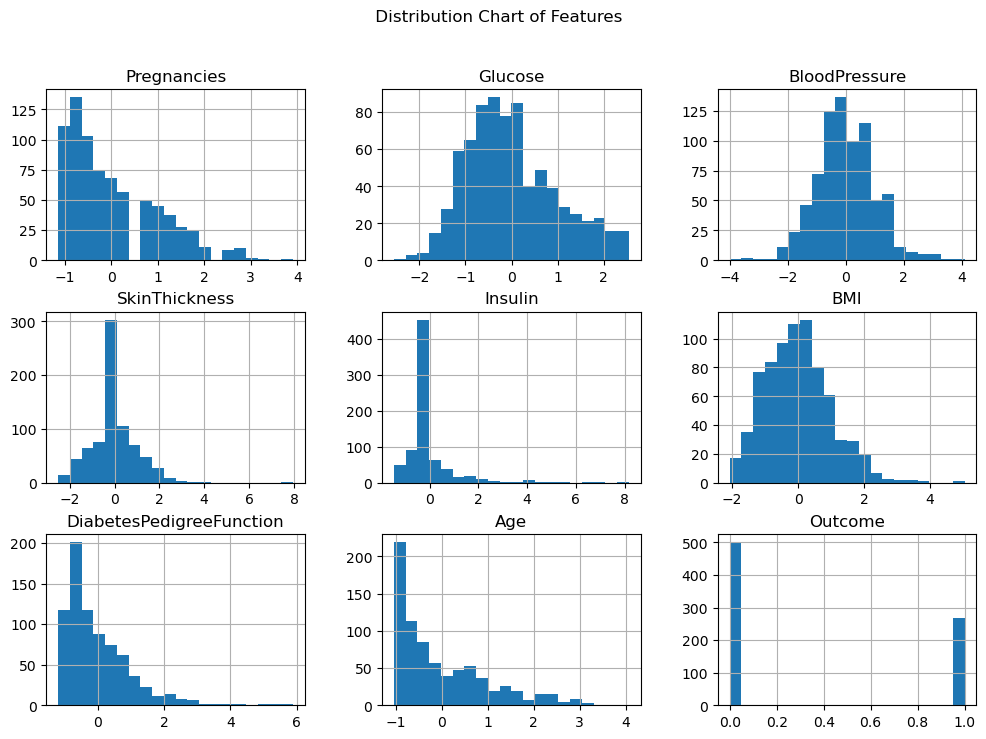

In [10]:
plt.figure(figsize=(12,8))
dt.hist(figsize = (12,8), bins=20)

plt.suptitle(" Distribution Chart of Features")
plt.show()